<a href="https://colab.research.google.com/github/AmanullaChishty/Pytorch/blob/main/CV_Custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Getting Data

In [2]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists")
else:
    print(f"Creating {image_path} directory, creating one")
    image_path.mkdir(parents=True, exist_ok=True)
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data")
        f.write(request.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data")
        zip_ref.extractall(image_path)

Creating data/pizza_steak_sushi directory, creating one
Unzipping pizza, steak, sushi data


## Data Preparation

In [3]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [4]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'


In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Image Path: data/pizza_steak_sushi/train/sushi/14046.jpg
Image Class: sushi
Image Size: (512, 384)


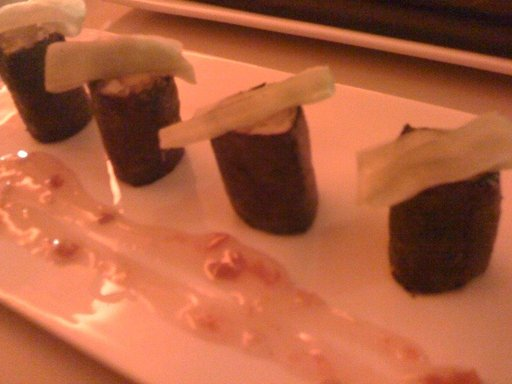

In [6]:
import random
from PIL import Image

random.seed(42)
img_paths = list(train_dir.glob("*/*.jpg"))
img_path = random.choice(img_paths)
img_class = img_path.parent.stem
img = Image.open(img_path)
print(f"Image Path: {img_path}")
print(f"Image Class: {img_class}")
print(f"Image Size: {img.size}")
img

(-0.5, 511.5, 383.5, -0.5)

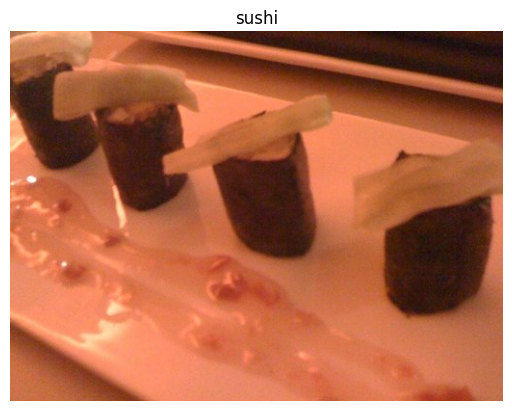

In [7]:
# Using imshow
img_as_array = np.asarray(img)
plt.imshow(img_as_array)
plt.title(img_class)
plt.axis(False)

## Data Transformation

In [8]:
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

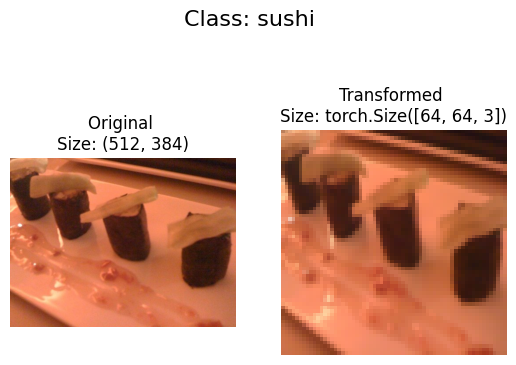

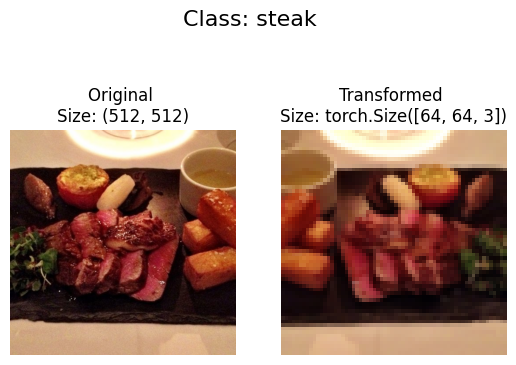

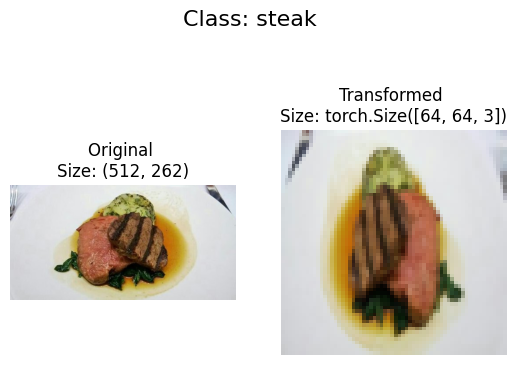

In [9]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
          fig, ax = plt.subplots(1, 2)
          ax[0].imshow(f)
          ax[0].set_title(f"Original \nSize: {f.size}")
          ax[0].axis("off")

          transformed_image = transform(f).permute(1,2,0)
          ax[1].imshow(transformed_image)
          ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
          ax[1].axis("off")
          fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(img_paths, transform=data_transform, n=3)

## Loading Image Data using ImageFolder

In [10]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [11]:
# Get class names as list
class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [12]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [13]:
len(train_data), len(test_data)

(225, 75)

In [14]:
img,label = train_data[0][0],train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image Label: {label}")
print(f"Label dtype: {type(label)}")
print(f"Image Shape: {img.shape}")
print(f"Image dtype : {img.dtype}")



Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Premute Image Shape: torch.Size([64, 64, 3])


(-0.5, 63.5, 63.5, -0.5)

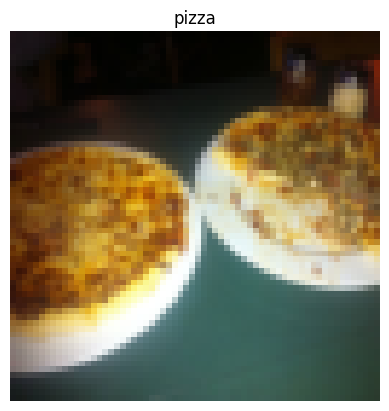

In [15]:
img_premute = img.permute(1,2,0)
print(f"Premute Image Shape: {img_premute.shape}")
plt.figsize = (10,7)
plt.imshow(img_premute)
plt.title(class_names[label])
plt.axis(False)

## Loaded images to Dataloader

In [16]:
os.cpu_count()

2

In [17]:
train_dataloader = DataLoader(dataset=train_data, batch_size=1, shuffle=True, num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_data, batch_size=1, shuffle=False, num_workers=os.cpu_count())

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79911de13280>,
 <torch.utils.data.dataloader.DataLoader at 0x79911de12da0>)

In [18]:
img,label = next(iter(train_dataloader))
print(f"Image Shape:{img.shape}")
print(f"Image Label Shape: {label.shape}")

Image Shape:torch.Size([1, 3, 64, 64])
Image Label Shape: torch.Size([1])


## Loading Data from a Custom Dataset

In [19]:
from typing import Tuple, Dict, List

In [20]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [21]:
target_directory = train_dir
print(f"Target directory: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data/pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


In [22]:
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}")
    class_to_idx = {cls_name:i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [23]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Custom Dataset to replicate ImageFolder

In [24]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):

  def __init__(self, targ_dir:str, transform=None) -> None:
    self.classes, self.class_to_idx = find_classes(targ_dir)
    self.paths = list(Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform

  def load_image(self, index:int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [25]:
# Augment train data
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [26]:
train_data_custom = ImageFolderCustom(train_dir, transform=train_transform)
test_data_custom = ImageFolderCustom(test_dir, transform=test_transform)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x79911de331c0>,
 <__main__.ImageFolderCustom at 0x79911de32680>)

In [27]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [28]:
train_data_custom.classes,train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Function to Display Random Images from the dataset

In [29]:
def display_random_images(dataset:torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  if n>10:
    n=10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

  if seed:
    random.seed(seed)
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16, 8))
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    targ_image_adjust = targ_image.permute(1, 2, 0)
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"class : {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)


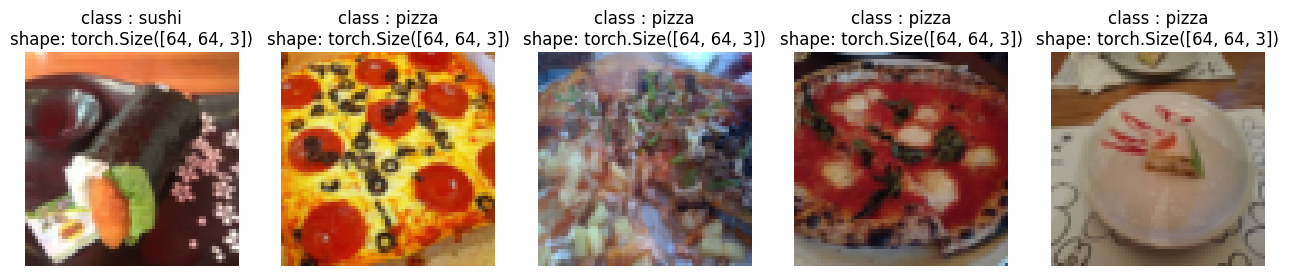

In [30]:
display_random_images(train_data, classes=class_names, n=5,seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


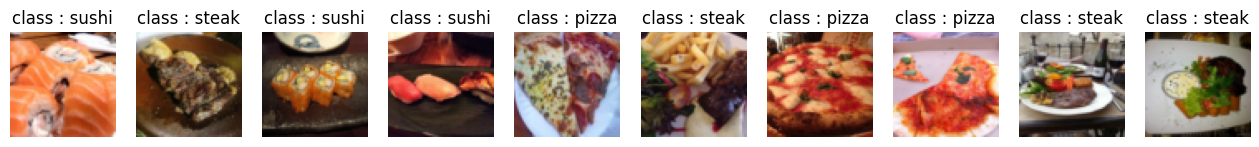

In [31]:
display_random_images(train_data_custom, classes=train_data_custom.classes, n=12,seed=None)

## Turn loaded images into DataLoader's

In [32]:
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=1, shuffle=True, num_workers=os.cpu_count())
test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size=1, shuffle=False, num_workers=os.cpu_count())

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x79911d2c5a80>,
 <torch.utils.data.dataloader.DataLoader at 0x79911d24f010>)

In [33]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## Data Augmnetation

In [34]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

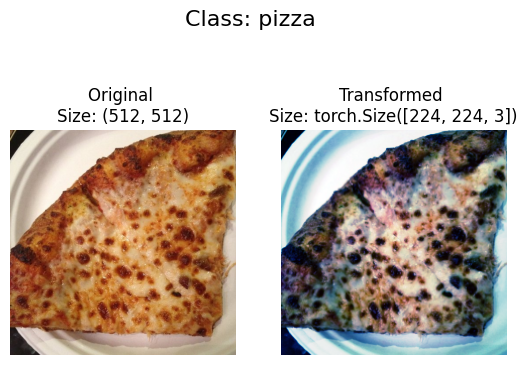

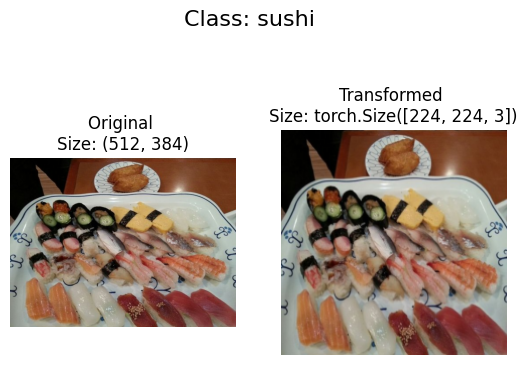

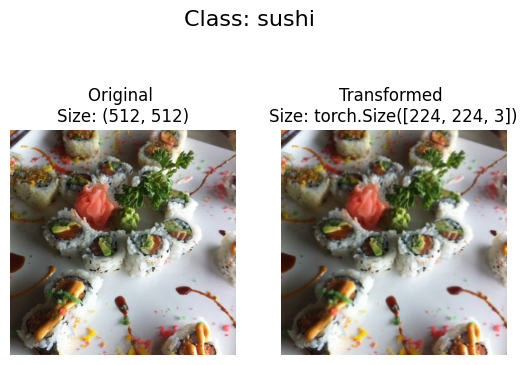

In [35]:
image_path_list = list(image_path.glob("*/*/*.jpg"))

plot_transformed_images(image_path_list, transform=train_transform, n=3,seed=None)

## MOdel 0: TinyVGG without data aug

In [36]:
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [37]:
train_data_simple = datasets.ImageFolder(train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(test_dir, transform=simple_transform)


In [38]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True, num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False, num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x79911d0dbd90>,
 <torch.utils.data.dataloader.DataLoader at 0x79911d0da6e0>)

In [39]:
# Model Class
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units, kernel_size=3, padding=1,stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units, kernel_size=3, padding=1,stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16, out_features=output_shape
    )
    )

  def forward(self, x:torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data_simple.classes))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

## Testing model on single image

In [40]:
img_batch, label_batch = next(iter(train_dataloader_simple))
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_0.eval()
with torch.inference_mode():
  pred = model_0(img_single)

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0578, 0.0634, 0.0351]])

Output prediction probabilities:
tensor([[0.3352, 0.3371, 0.3277]])

Output prediction label:
tensor([1])

Actual label:
2


In [41]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

In [42]:
from torchinfo import summary
summary(model_0, input_size=(1,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## Creat a train and test loop


In [43]:
def train_step(model: nn.Module,
               dataloader: DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer):
  model.train()
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(dataloader):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [44]:
def test_step(model: nn.Module,
              dataloader: DataLoader,
              loss_fn: nn.Module):
  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [45]:
from tqdm.auto import tqdm
def train(model: nn.Module,
          train_dataloader: DataLoader,
          test_dataloader: DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []
  }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    print(f"Epoch:{epoch+1} | train_loss:{train_loss:.4f} | train_acc:{train_acc:.4f} | test_loss:{test_loss:.4f} | test_acc:{test_acc:.4f}")
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

## Train and Evaluate Model0

In [46]:
torch.manual_seed(42)

NUM_EPOCHS = 10

model_0 = TinyVGG(input_shape=3, hidden_units=10,
                  output_shape=len(train_data_simple.classes))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:1 | train_loss:1.1078 | train_acc:0.2578 | test_loss:1.1362 | test_acc:0.2604
Epoch:2 | train_loss:1.0846 | train_acc:0.4258 | test_loss:1.1622 | test_acc:0.1979
Epoch:3 | train_loss:1.1153 | train_acc:0.2930 | test_loss:1.1695 | test_acc:0.1979
Epoch:4 | train_loss:1.0990 | train_acc:0.2891 | test_loss:1.1343 | test_acc:0.1979
Epoch:5 | train_loss:1.0990 | train_acc:0.2930 | test_loss:1.1434 | test_acc:0.1979
Epoch:6 | train_loss:1.0964 | train_acc:0.3125 | test_loss:1.1483 | test_acc:0.2604
Epoch:7 | train_loss:1.1187 | train_acc:0.3203 | test_loss:1.1423 | test_acc:0.3125
Epoch:8 | train_loss:1.1015 | train_acc:0.3555 | test_loss:1.1051 | test_acc:0.1979
Epoch:9 | train_loss:1.0893 | train_acc:0.4688 | test_loss:1.0687 | test_acc:0.5417
Epoch:10 | train_loss:1.0683 | train_acc:0.4023 | test_loss:1.0169 | test_acc:0.5417
Total training time: 40.078 seconds


## Plot the loss curves of Model 0

In [47]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [48]:
def plot_loss_curves(results):
  loss = results["train_loss"]
  test_loss = results["test_loss"]
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]
  epochs = range(len(results["train_loss"]))
  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

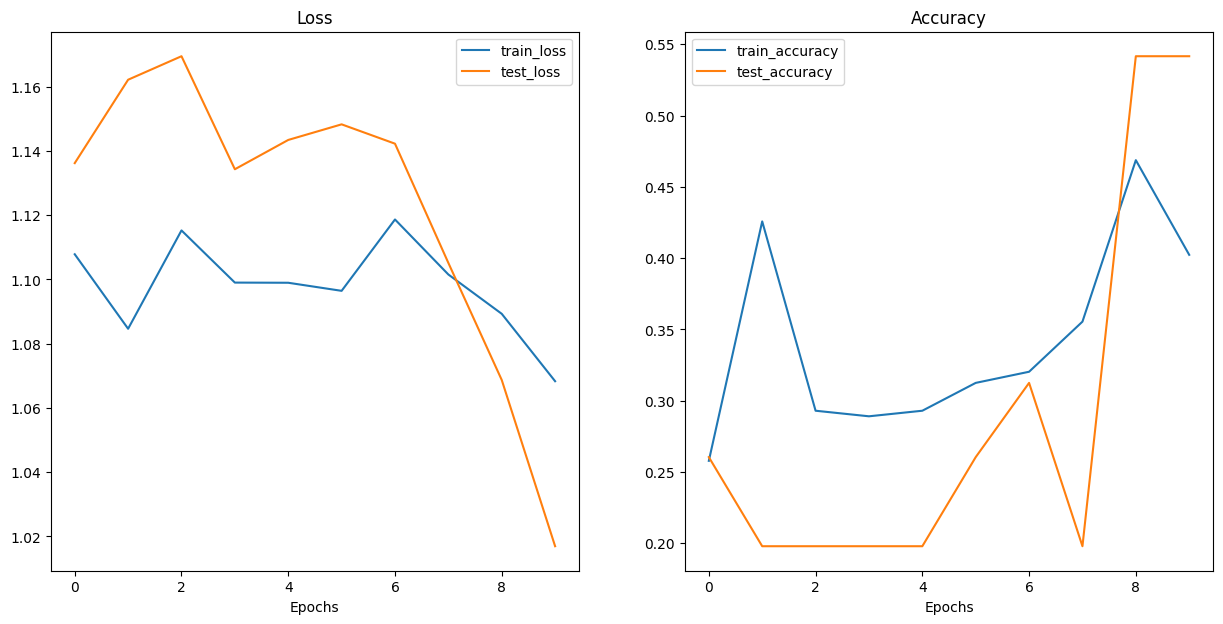

In [49]:
plot_loss_curves(model_0_results)

## Model 1 : TinyVGG with Data Augmentation

In [50]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [51]:
train_data_augmented = datasets.ImageFolder(train_dir,
                                            transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)
train_data_augmented,test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [52]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True, num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                       batch_size=BATCH_SIZE,
                                       shuffle=False, num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_simple


Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x79911d0da140>,
 <torch.utils.data.dataloader.DataLoader at 0x79911d2e1de0>)

## Constrcuct and train Model 1

In [53]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes))
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [54]:
torch.manual_seed(42)
NUM_EPOCHS = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:1 | train_loss:1.1076 | train_acc:0.2500 | test_loss:1.1062 | test_acc:0.2604
Epoch:2 | train_loss:1.0791 | train_acc:0.4258 | test_loss:1.1387 | test_acc:0.2604
Epoch:3 | train_loss:1.0810 | train_acc:0.4258 | test_loss:1.1696 | test_acc:0.2604
Epoch:4 | train_loss:1.1292 | train_acc:0.3047 | test_loss:1.1625 | test_acc:0.2604
Epoch:5 | train_loss:1.0899 | train_acc:0.4258 | test_loss:1.1482 | test_acc:0.2604
Epoch:6 | train_loss:1.0953 | train_acc:0.3047 | test_loss:1.1437 | test_acc:0.2604
Epoch:7 | train_loss:1.0874 | train_acc:0.4023 | test_loss:1.1391 | test_acc:0.1979
Epoch:8 | train_loss:1.1062 | train_acc:0.2930 | test_loss:1.1491 | test_acc:0.1979
Epoch:9 | train_loss:1.1202 | train_acc:0.3281 | test_loss:1.1534 | test_acc:0.3021
Epoch:10 | train_loss:1.0744 | train_acc:0.5234 | test_loss:1.0900 | test_acc:0.3220


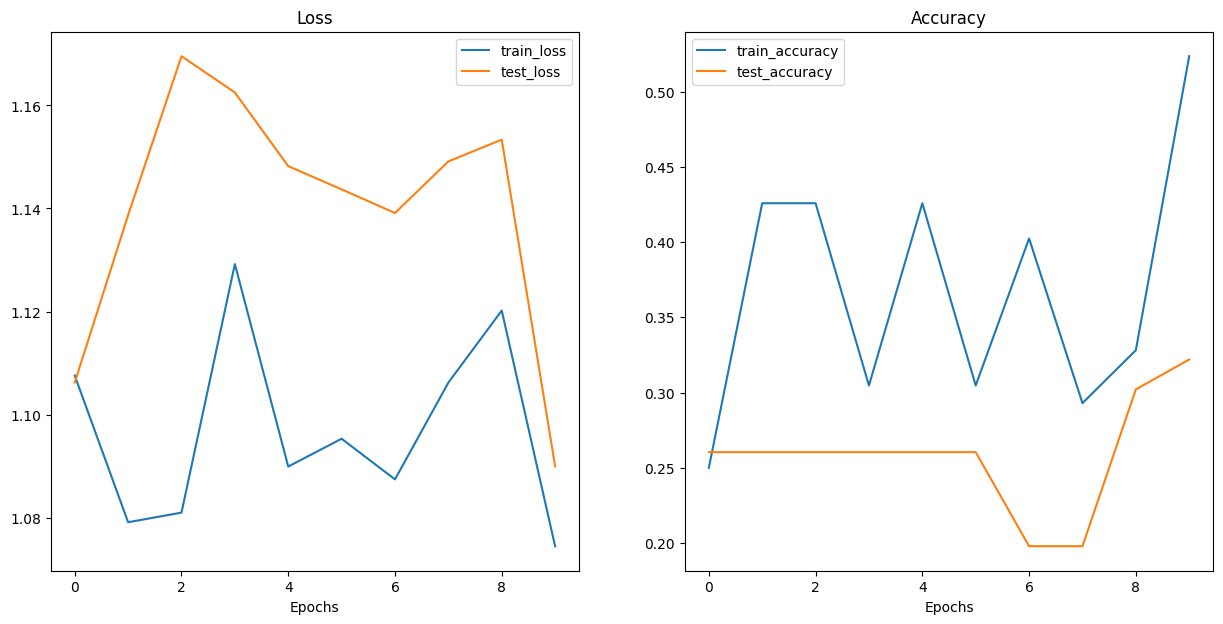

In [55]:
plot_loss_curves(model_1_results)

## Compare Model Results

In [56]:
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df.head()

,train_loss,train_acc,test_loss,test_acc
0,1.107836,0.257812,1.136208,0.260417
1,1.084645,0.425781,1.162171,0.197917
2,1.115261,0.292969,1.169489,0.197917
3,1.099015,0.289062,1.134302,0.197917
4,1.098965,0.292969,1.143424,0.197917


Text(0.5, 0, 'Epochs')

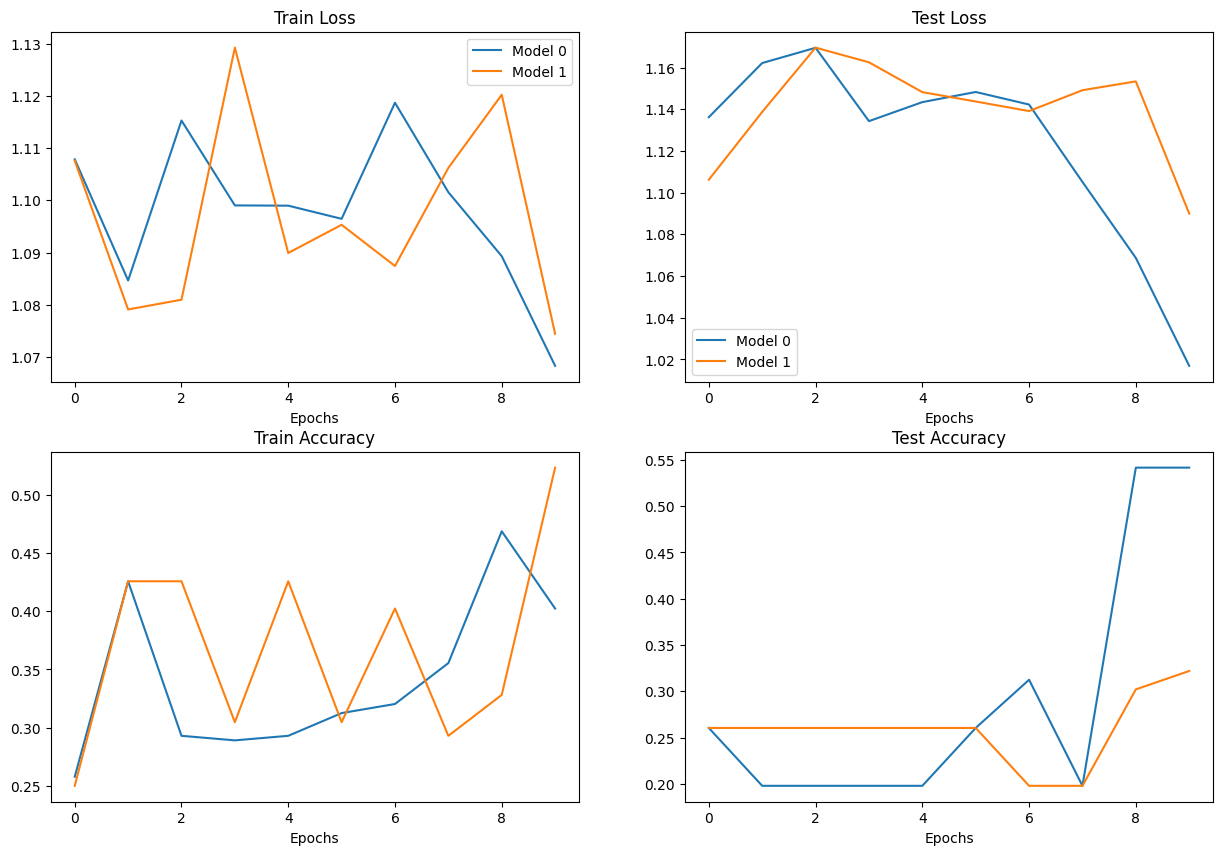

In [57]:
plt.figure(figsize=(15,10))
epochs = range(len(model_0_df))
plt.subplot(2,2,1)
plt.plot(epochs,model_0_df.train_loss, label="Model 0")
plt.plot(epochs,model_1_df.train_loss, label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs,model_0_df.test_loss, label="Model 0")
plt.plot(epochs,model_1_df.test_loss, label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs,model_0_df.train_acc, label="Model 0")
plt.plot(epochs,model_1_df.train_acc, label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")

plt.subplot(2,2,4)
plt.plot(epochs,model_0_df.test_acc, label="Model 0")
plt.plot(epochs,model_1_df.test_acc, label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")

## Making Prediction on a custom image

In [58]:
import requests
custom_image_path = data_path /"pizza_image.jpep"
img_url = "https://images.unsplash.com/photo-1513104890138-7c749659a591?w=800&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8fA%3D%3D"
with open(custom_image_path,"wb") as f:
  request = requests.get(img_url)
  f.write(request.content)

In [61]:
import torchvision
custom_image_unit8 = torchvision.io.read_image(str(custom_image_path))
print(f"{custom_image_unit8}\n{custom_image_unit8.shape}\n{custom_image_unit8.dtype}")

tensor([[[ 28,  28,  28,  ..., 134, 133, 128],
         [ 28,  28,  28,  ..., 128, 132, 132],
         [ 28,  28,  28,  ..., 121, 127, 131],
         ...,
         [145, 142, 145,  ..., 206, 214, 208],
         [144, 139, 139,  ..., 215, 222, 209],
         [149, 141, 136,  ..., 224, 228, 214]],

        [[ 24,  24,  24,  ...,  77,  77,  72],
         [ 24,  24,  24,  ...,  71,  75,  76],
         [ 24,  24,  24,  ...,  61,  68,  72],
         ...,
         [ 90,  86,  86,  ..., 158, 163, 155],
         [ 89,  83,  80,  ..., 174, 177, 163],
         [ 93,  85,  77,  ..., 189, 192, 176]],

        [[ 15,  15,  15,  ...,   8,   3,   0],
         [ 15,  15,  15,  ...,   4,   4,   2],
         [ 15,  15,  15,  ...,   0,   2,   4],
         ...,
         [ 33,  29,  30,  ...,  96, 108, 103],
         [ 32,  26,  24,  ..., 128, 138, 129],
         [ 34,  26,  21,  ..., 157, 168, 157]]], dtype=torch.uint8)
torch.Size([3, 533, 800])
torch.uint8


In [62]:
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_unit8)

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [63]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image = custom_image / 255.
custom_image.shape, custom_image.dtype

(torch.Size([3, 533, 800]), torch.float32)

(-0.5, 799.5, 532.5, -0.5)

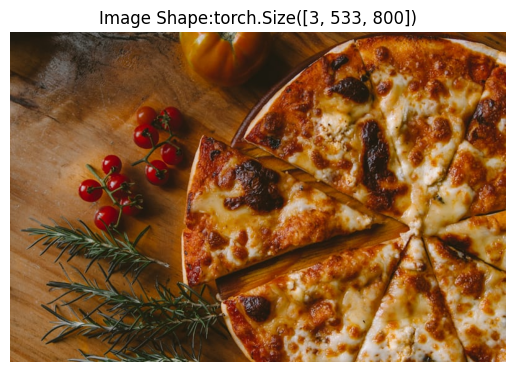

In [64]:
plt.imshow(custom_image.permute(1,2,0))
plt.title(f"Image Shape:{custom_image.shape}")
plt.axis(False)

In [65]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

custom_image_transformed = custom_image_transform(custom_image)
custom_image_transformed.shape,custom_image.shape

(torch.Size([3, 64, 64]), torch.Size([3, 533, 800]))

In [67]:
custom_image_transformed.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [68]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0))



In [69]:
custom_image_pred

tensor([[ 0.0499, -0.0125, -0.0650]])

In [70]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3532, 0.3319, 0.3149]])

In [71]:
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_label

tensor([0])

In [72]:
custom_image_pred_class = class_names[custom_image_pred_label]
custom_image_pred_class

'pizza'

In [73]:
custom_image_pred_probs

tensor([[0.3532, 0.3319, 0.3149]])